<a href="https://colab.research.google.com/github/AAdewunmi/Laptop_Prices_Prediction_Project/blob/main/Laptop_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title: Laptop Price Prediction Analysis

Objective:

This project is about predicting the price of laptops based on several features.
The workflow is similar to any other end to end, full stack data science supervised learning project i.e. we load the data into pandas data frame, we do exploratory data analysis (EDA), model building, select an algorithm for prediction, then we do hyperparameter tuning of the algorithm.


In [66]:
# Import dependencies
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
# Load project data
# sample data can be found in '/sample_data/laptop_data.csv'
df = pd.read_csv('/content/sample_data/laptop_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [68]:
# Display all columns
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [69]:
# Remove Unnamed column (Col 0)
df = df[['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price']]
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [70]:
# Check DataFrame has null values
df.isnull().sum()

,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0
Weight,0


In [71]:
# Check for duplicate rows
int(df.duplicated().sum())

29

In [72]:
# Print information about DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [73]:
# Separate the category features and numerical features
catvars = df.select_dtypes(include=['object']).columns
numvars = df.select_dtypes(include=['int32', 'int64', 'float32', 'float64']).columns
catvars, numvars

(Index(['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram', 'Memory',
        'Gpu', 'OpSys', 'Weight'],
       dtype='object'),
 Index(['Inches', 'Price'], dtype='object'))

In [74]:
# Find and count unique values present in a particular column
def uniquevals(col):
  print(f'Details of the particular col {col} is : {df[col].unique()}')


def valuecounts(col):
  print(f'Valuecounts of the particular col {col} is : {df[col].value_counts()}')


for col in df.columns:
  uniquevals(col)
  print("-"*75)


Details of the particular col Company is : ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
---------------------------------------------------------------------------
Details of the particular col TypeName is : ['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']
---------------------------------------------------------------------------
Details of the particular col Inches is : [13.3 15.6 15.4 14.  12.  11.6 17.3 10.1 13.5 12.5 13.  18.4 13.9 12.3
 17.  15.  14.1 11.3]
---------------------------------------------------------------------------
Details of the particular col ScreenResolution is : ['IPS Panel Retina Display 2560x1600' '1440x900' 'Full HD 1920x1080'
 'IPS Panel Retina Display 2880x1800' '1366x768'
 'IPS Panel Full HD 1920x1080' 'IPS Panel Retina Display 2304x1440'
 'IPS Panel Full HD / Touchscreen 1920x1080'
 'Full HD / Touchscreen 19

In [87]:
import pandas as pd
from io import StringIO

def convert_to_numeric(series, unit_to_remove, dtype):
    """
    Removes a specified unit from string values in a Series and converts it to a numeric dtype.

    Args:
        series (pd.Series): The Series to process.
        unit_to_remove (str): The unit string to remove (e.g., 'GB', 'kg').
        dtype (str): The target numeric dtype ('int32', 'float32').

    Returns:
        pd.Series: The converted Series.
    """
    try:
        cleaned_series = series.str.replace(unit_to_remove, '', regex=False).astype(dtype)
        return cleaned_series
    except AttributeError:
        print(f"Warning: Column already seems to be non-string, attempting direct conversion to {dtype}.")
        try:
            return series.astype(dtype)
        except ValueError as e:
            print(f"Error converting to {dtype}: {e}")
            return series

# Apply the conversion functions using .loc for assignment
df.loc[:, 'Ram'] = convert_to_numeric(df['Ram'], 'GB', 'int32')
df.loc[:, 'Weight'] = convert_to_numeric(df['Weight'], 'kg', 'float32')

print(df.head())
print(df.info())

  Company   TypeName  Inches                    ScreenResolution  \
0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook    13.3                            1440x900   
2      HP   Notebook    15.6                   Full HD 1920x1080   
3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu  Ram               Memory  \
0        Intel Core i5 2.3GHz    8            128GB SSD   
1        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3        Intel Core i7 2.7GHz   16            512GB SSD   
4        Intel Core i5 3.1GHz    8            256GB SSD   

                            Gpu  OpSys  Weight        Price  TouchScreen  
0  Intel Iris Plus Graphics 640  macOS    1.37   71378.6832            0  
1        Intel HD Graphics 6000  macOS    1.34   47895.5232            0  
2         I

In [76]:
# Print information about DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


# Exploratory Data Analysis (EDA)

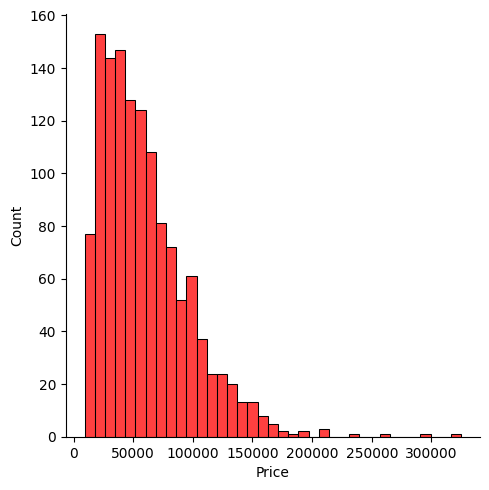

In [77]:
# Display the distribution of price.
sn.displot(df['Price'], color='red')

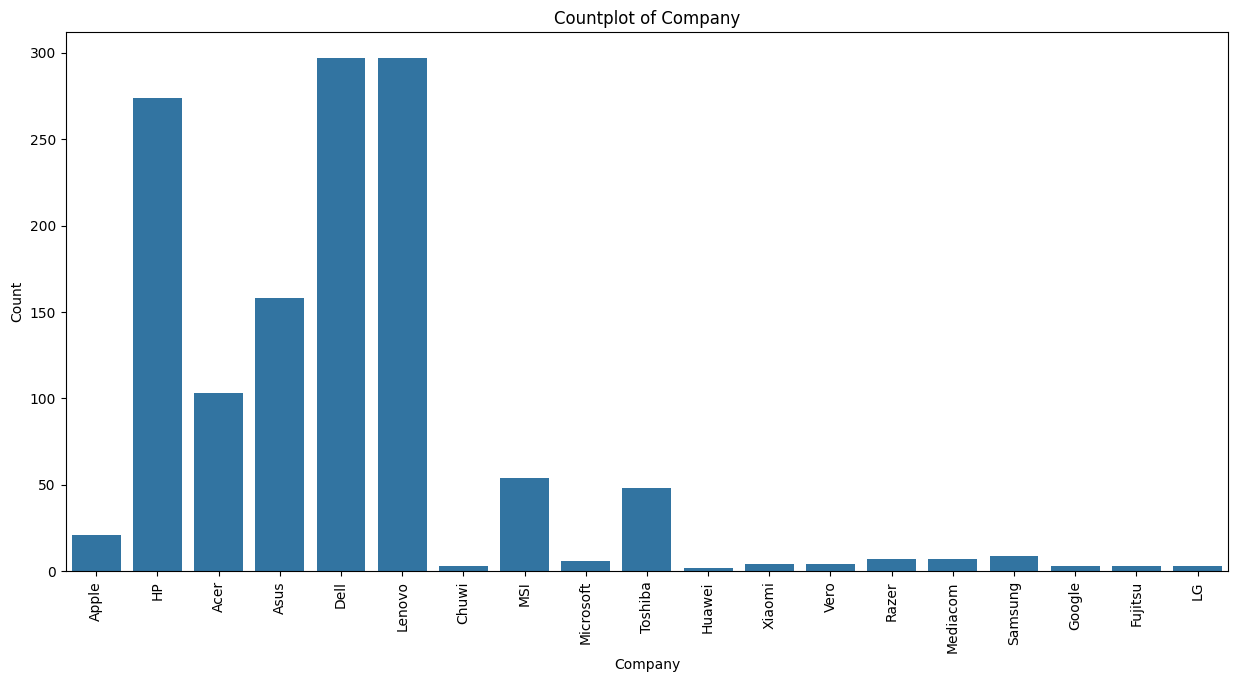

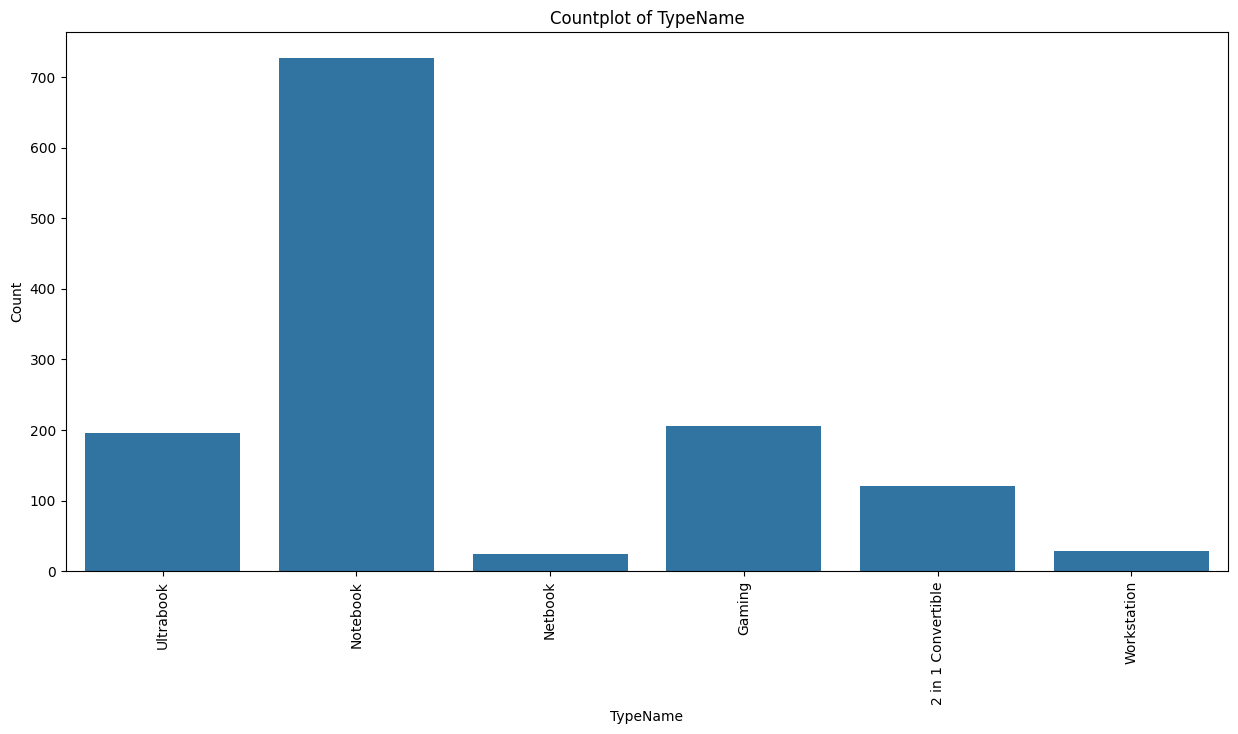

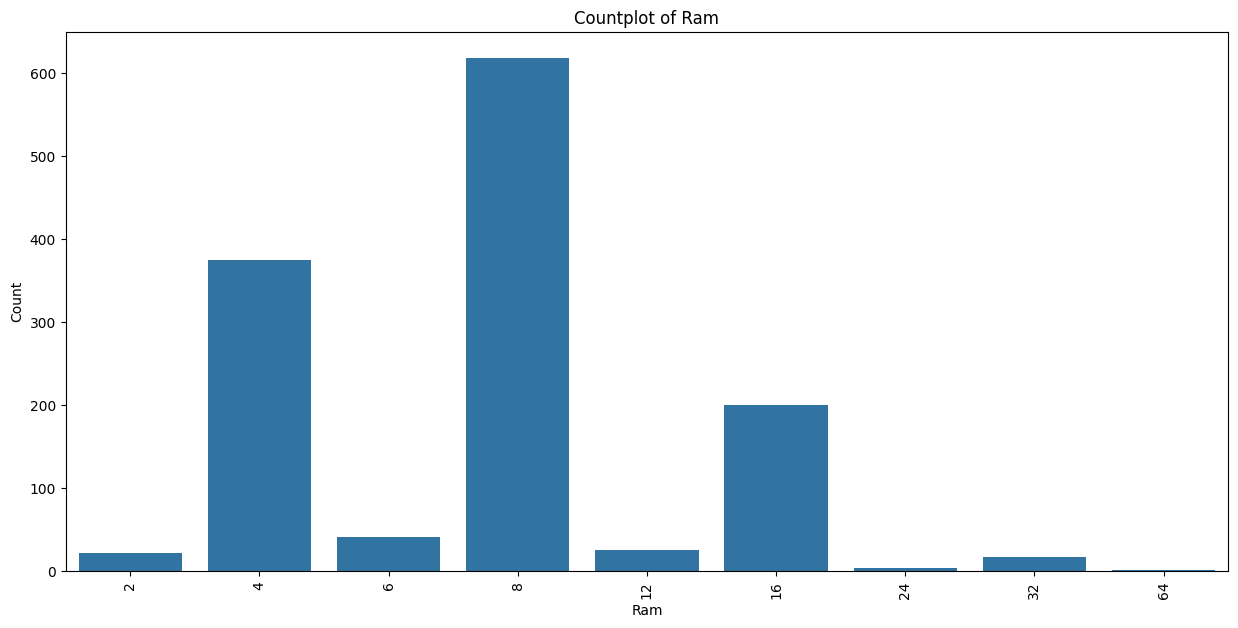

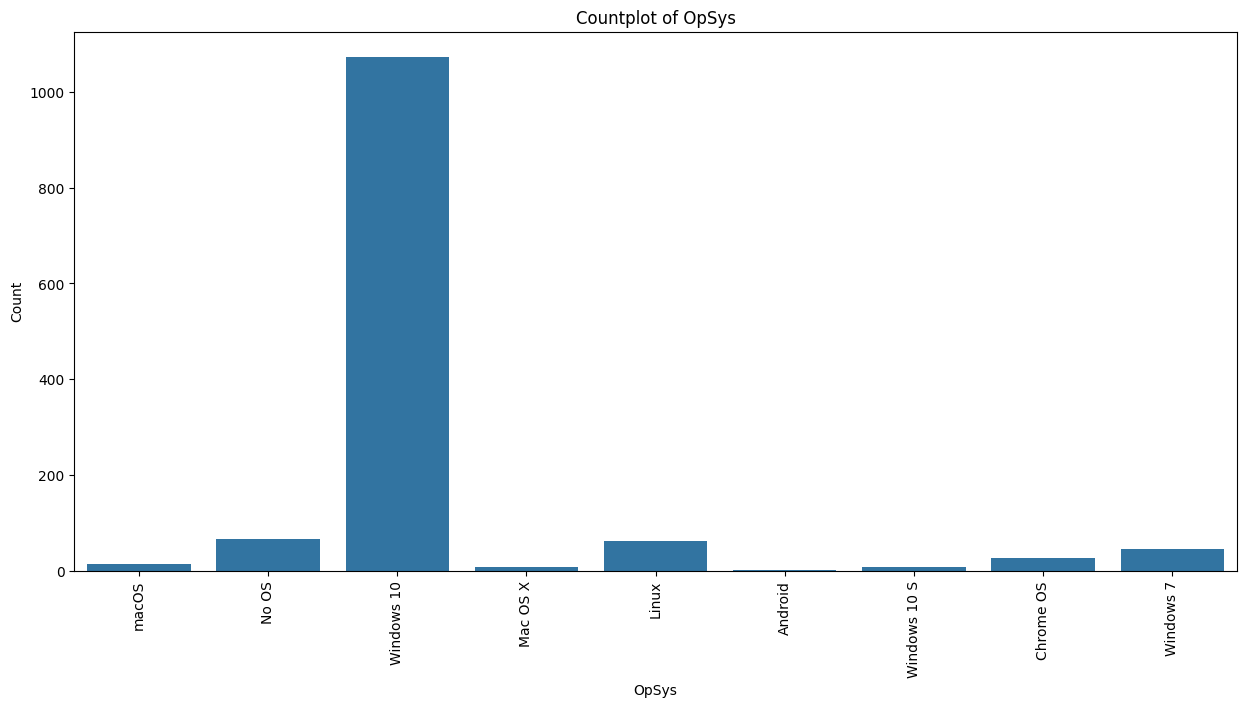

In [78]:
# Display countplots for the categorical variables
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

def drawplot(col):
  plt.figure(figsize=(15,7))
  sn.countplot(x=df[col])
  plt.xticks(rotation='vertical')
  plt.title(f'Countplot of {col}')
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.show()


toview = ['Company', 'TypeName', 'Ram', 'OpSys']
for col in toview:
  drawplot(col)

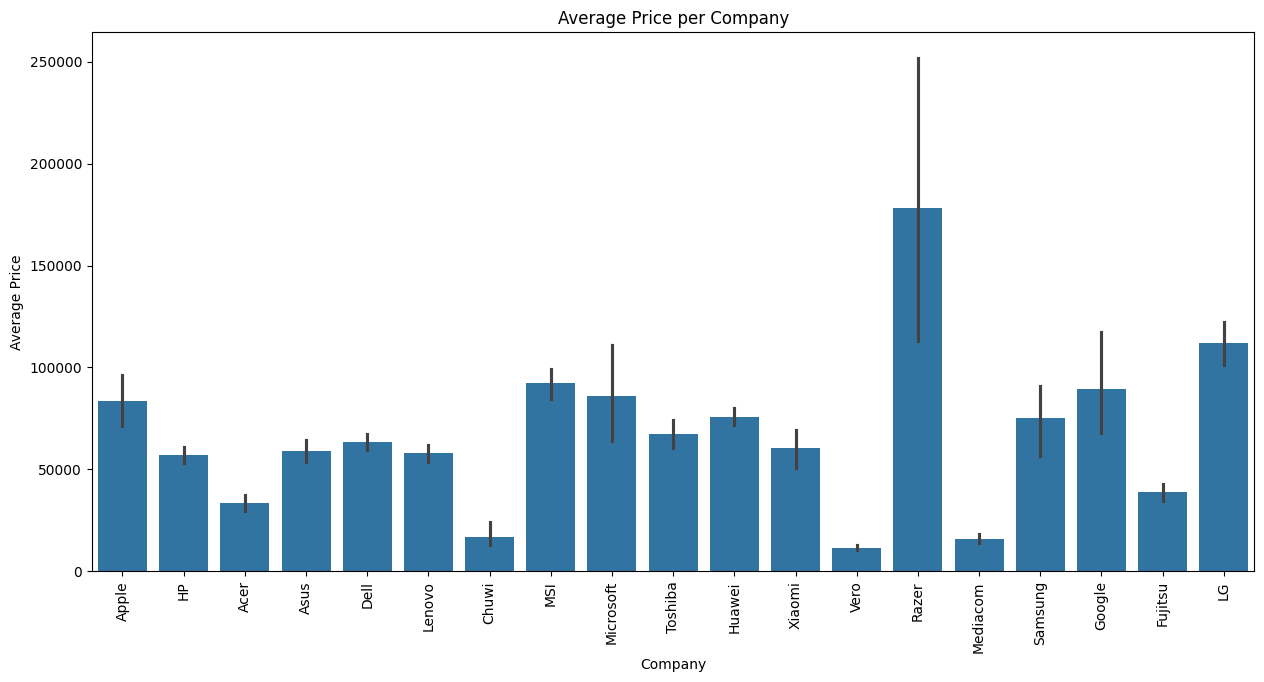

In [79]:
# Display average price for each of the laptop brands
# this will give us an insight into the variation
# in laptop pricing between companies.

import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

def draw_barplot_company_price(df):
  """
  Displays a bar plot of average price per company.

  Args:
    dataframe (pd.DataFrame): The DataFrame containing 'Company' and 'Price' columns.
  """
  plt.figure(figsize=(15, 7))
  sn.barplot(x=df['Company'], y=df['Price'])
  plt.xticks(rotation='vertical')
  plt.title('Average Price per Company')
  plt.xlabel('Company')
  plt.ylabel('Average Price')
  plt.show()

# Call the function with your DataFrame
draw_barplot_company_price(df)


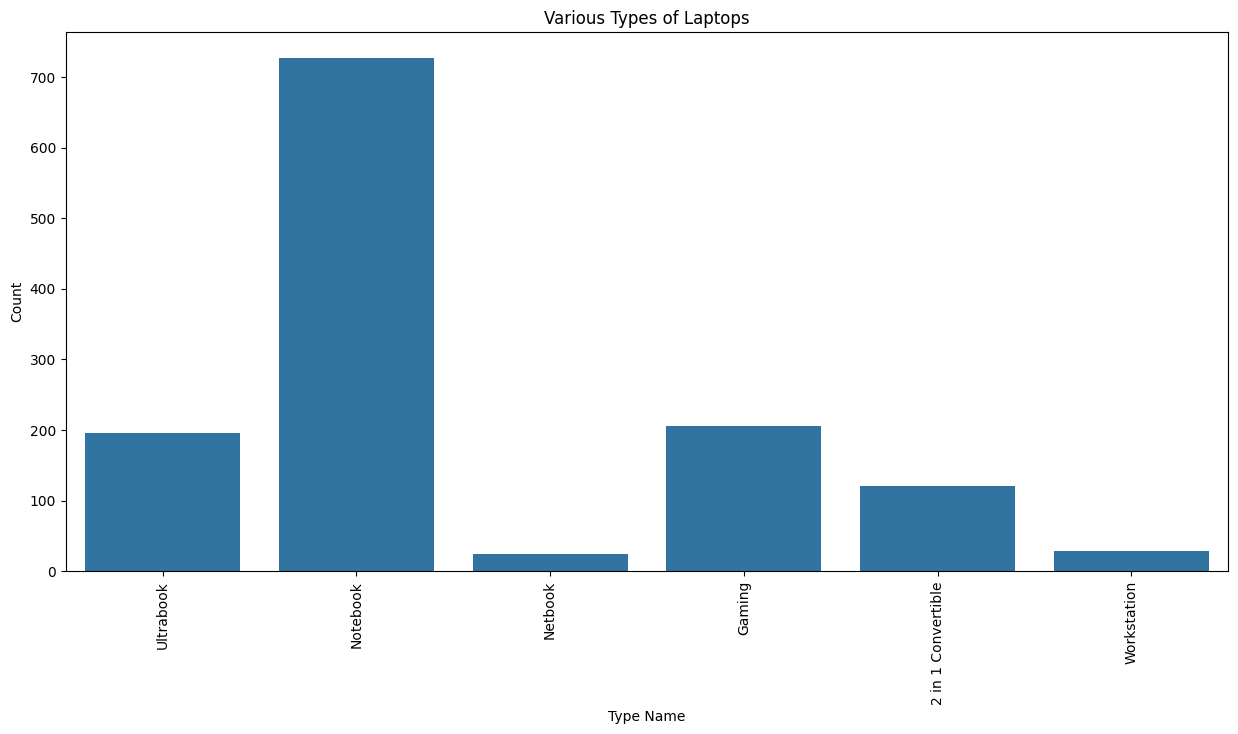

In [80]:
# Display various types of Laptops

import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

def plot_laptop_types(dataframe, palette='autumn'):
  """
  Displays a countplot of different laptop types.

  Args:
    dataframe (pd.DataFrame): The DataFrame containing the 'TypeName' column.
    palette (str, optional): The color palette to use for the plot. Defaults to 'autumn'.
  """
  plt.figure(figsize=(15, 7))
  sn.countplot(x=dataframe['TypeName'])
  plt.xticks(rotation='vertical')
  plt.title('Various Types of Laptops')
  plt.xlabel('Type Name')
  plt.ylabel('Count')
  plt.show()

# Call the function
plot_laptop_types(df)

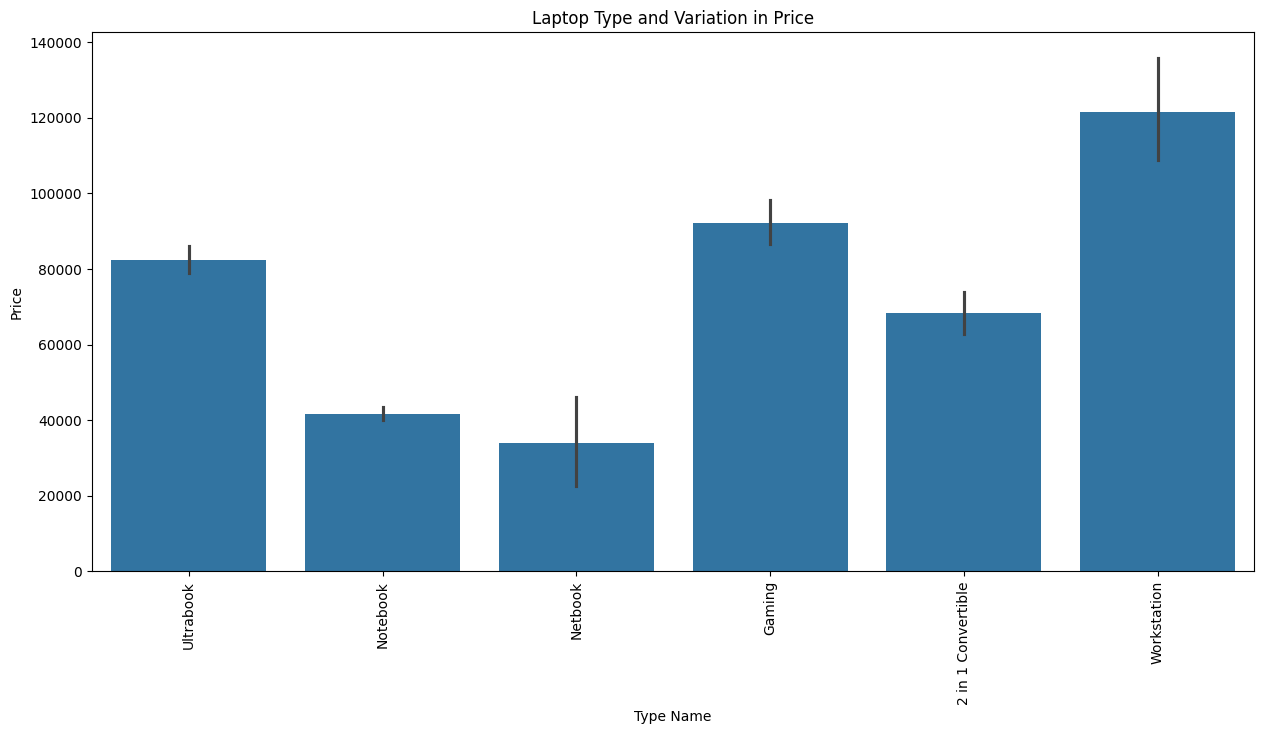

In [81]:
# Display laptop type and variation in price

import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

def plot_type_price_variation(dataframe):
  """
  Displays a bar plot showing the variation in price for each laptop type.

  Args:
    dataframe (pd.DataFrame): The DataFrame containing 'TypeName' and 'Price' columns.
  """
  plt.figure(figsize=(15, 7))
  sn.barplot(x=dataframe['TypeName'], y=dataframe['Price'])
  plt.xticks(rotation='vertical')
  plt.title('Laptop Type and Variation in Price')
  plt.xlabel('Type Name')
  plt.ylabel('Price')
  plt.show()

# Call the function
plot_type_price_variation(df)

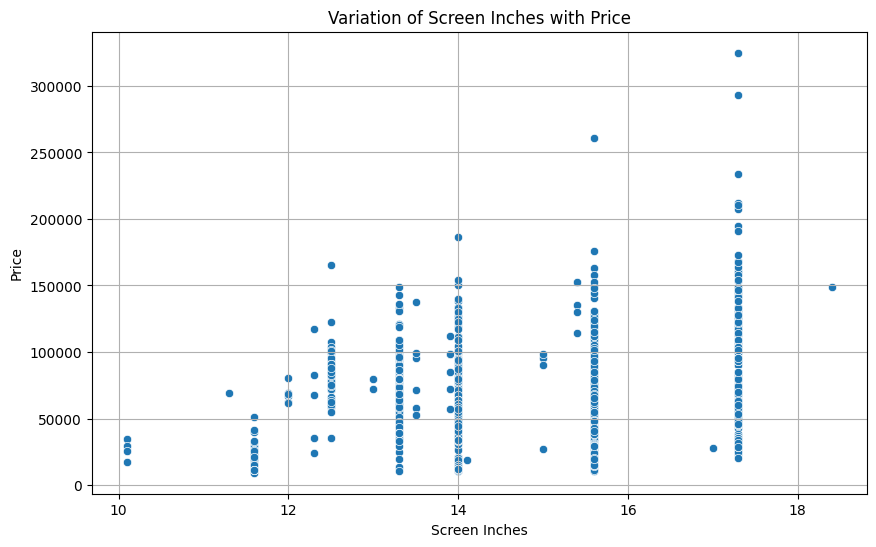

In [82]:
# Display variation of screen inches with price

import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

def plot_screen_size_price(dataframe):
  """
  Displays a scatter plot showing the variation of screen inches with price.

  Args:
    dataframe (pd.DataFrame): The DataFrame containing 'Inches' and 'Price' columns.
  """
  plt.figure(figsize=(10, 6))
  sn.scatterplot(x=dataframe['Inches'], y=dataframe['Price'])
  plt.title('Variation of Screen Inches with Price')
  plt.xlabel('Screen Inches')
  plt.ylabel('Price')
  plt.grid(True)
  plt.show()

# Call the function
plot_screen_size_price(df)

In [83]:
# Display screen resolution count
df['ScreenResolution'].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,507
1366x768,281
IPS Panel Full HD 1920x1080,230
IPS Panel Full HD / Touchscreen 1920x1080,53
Full HD / Touchscreen 1920x1080,47
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,15
IPS Panel 4K Ultra HD 3840x2160,12


In [84]:
# Create a new column, touchscreen, with the condition
# if the value of touchscreen is 1, then the laptop is a
# touchscreen laptop.

df['TouchScreen'] = df['ScreenResolution'].apply(lambda element: 1 if 'TouchScreen' in element else 0)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


In [85]:
# Display a sample of the DataFrame
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
810,HP,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,12,1TB HDD,AMD Radeon RX 580,Windows 10,3.74,93186.7200,0
826,Asus,2 in 1 Convertible,13.3,Touchscreen / Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.10,72354.2400,0
353,HP,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD,Nvidia Quadro M1200,Windows 10,2.60,92615.0256,0
1070,Dell,Notebook,15.6,1366x768,Intel Core i3 6100U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,2.06,25679.8944,0
238,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7820HK 2.9GHz,32,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1080,Windows 10,4.70,207259.2000,0
